In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks


In [2]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

In [3]:
from test_main import setup 

binary = os.path.abspath("./password_comparison/password_comparison")
outputfile = "./password_comparison/password_comparison.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
[('movl -0x1c(%rbp), %eax', 1), ('addl $1, %eax', 1), ('movl %eax, -0x1c(%rbp)', 1)]


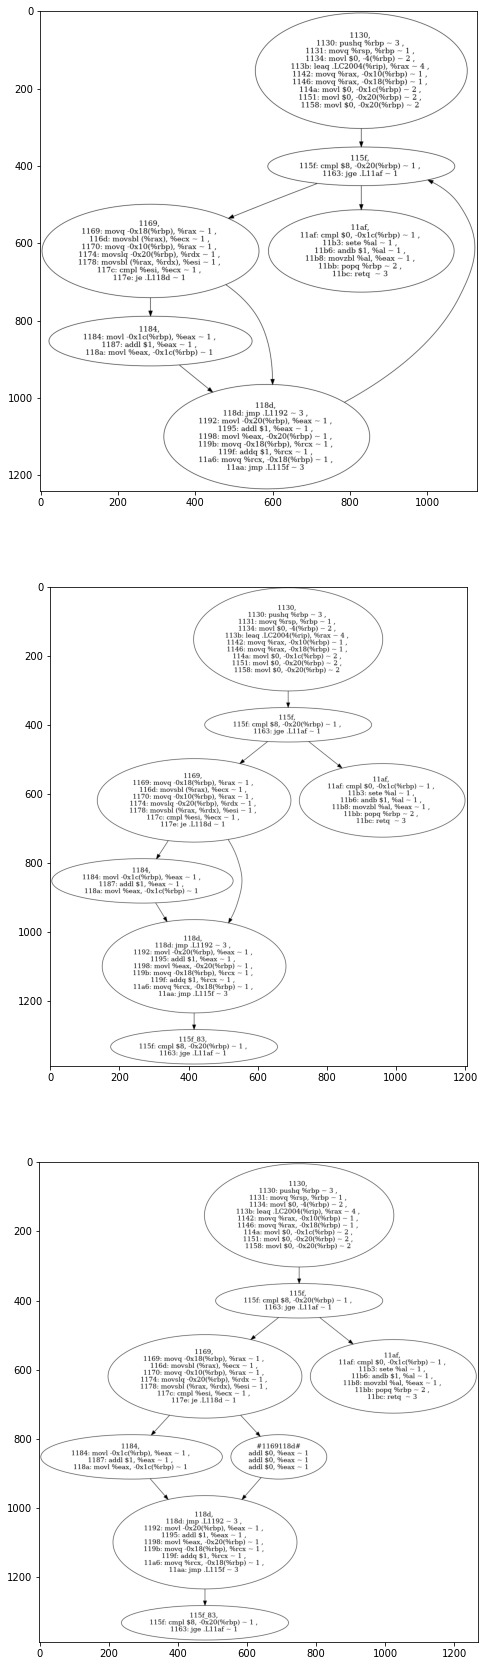

In [14]:
from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point


outputfile = "./password_comparison/password_comparison_rw.s"
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(3, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)

control_flow_graph.merge_consecutive_nodes()
axs[0].imshow(to_img(graph))


control_flow_graph.unwind_graph()

axs[1].imshow(to_img(graph))
control_flow_graph.insert_nodes()
target_node = control_flow_graph.get_node('1169')

balance_branching_point(control_flow_graph, target_node)
axs[2].imshow(to_img(graph))

control_flow_graph.merge_inserted_nodes()

# axs[2].imshow(to_img(graph))

rw.dump()
    

# Balance node latencies 


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
[('movq -0x18(%rbp), %rax', 1), ('movsbl (%rax), %ecx', 1), ('movq -0x10(%rbp), %rax', 1), ('movslq -0x20(%rbp), %rdx', 1), ('movsbl (%rax, %rdx), %esi', 1), ('cmpl %esi, %ecx', 1), ('je .L118d', 1), ('movq %xmm0, %xmm0', 2), ('sub $0x8, %rsp', 3), ('pushq %rax', 3), ('mulq %rax', 3), ('popq %rax', 3), ('add $0x8, %rsp', 3)]


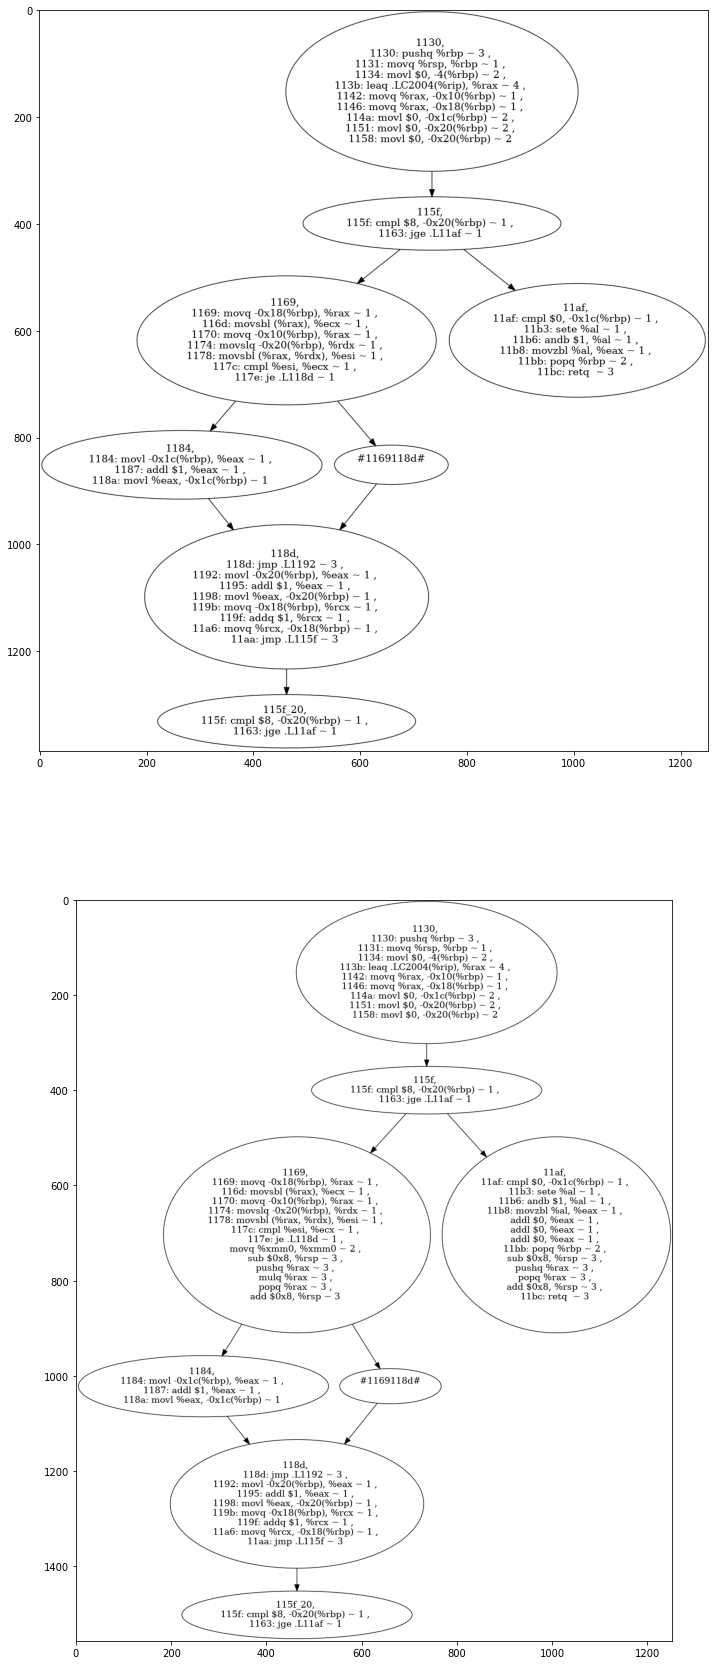

In [15]:
from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point, balance_node_latencies


outputfile = "./password_comparison/password_comparison_rw.s"
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(2, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)

control_flow_graph.merge_consecutive_nodes()


control_flow_graph.unwind_graph()

control_flow_graph.insert_nodes()
# target_node = control_flow_graph.get_node('1169')

# balance_branching_point(control_flow_graph, target_node)

# control_flow_graph.merge_inserted_nodes()

axs[0].imshow(to_img(graph))

a = control_flow_graph.get_node('1169')
b = control_flow_graph.get_node('11af')

balance_node_latencies(a, b)
axs[1].imshow(to_img(graph))

# balance_node_latencies(a, b)


In [ ]:
%autoreload 2

from rwtools.nemesis.latency_balancing import compute_missing_latencies
current_latencies = [1, 1, 1, 1, 1, 1, 1]
target_latencies = [1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3]

missing_latencies = compute_missing_latencies(current_latencies, target_latencies)


missing_latencies